In [1]:
import matplotlib.pyplot as plt
import numpy as np

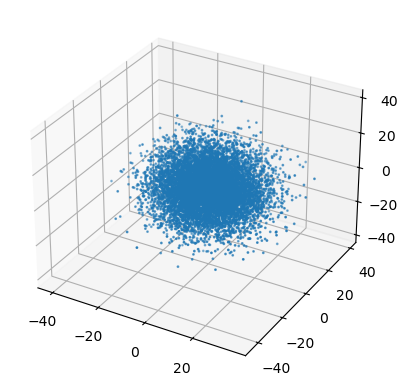

In [2]:
# Definitions
nparts = 10000
mu = 0
sigma = 10
xyz = sigma * np.random.randn(nparts, 3) + mu
# help(np.random.randn)

# 3D scatter plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], s=1)

In [3]:
# Shell class definition
class shell:
    def __init__(self, r_inner, r_outer):
        self.r_inner = r_inner # inner shell radius
        self.r_outer = r_outer # outer shell radius

    def count_parts_in_shell(self, distances):
        """
        shell (class) - shell object
        data (arr) - data array of shape (n, 3)
        """
        
        # Find particles
        mask = (distances >= self.r_inner) & (distances < self.r_outer)
        count = np.sum(mask)
        return count

In [4]:
# Get COM and distances from COM
com = np.mean(xyz, axis=0)
distances = np.linalg.norm(xyz - com, axis = 1)

In [5]:
# Shell parameter definition
n_shells = 100
R0 = np.min(distances) * 10 # Some arbitrary initial radius
# t = np.ones(n_shells) * np.max(distances) / n_shells # for constant shell thicknesses

# For variable thickness
def var_r(n_shells, R0):
    r = [0] # initialise with zero as "1st" radius, i.e., first inner radius
    Rprev = R0
    r.append(Rprev)
    for n in range(n_shells):
        t = (Rprev**3 + R0**3)**(1/3) - Rprev
        Rprev = Rprev + t
        r.append(Rprev)
    return r
r = var_r(n_shells, R0)

parts_per_shell = []
part_ratio = []
for n in range(n_shells):
    # r = n * t[n] # for constant shell thicknesses
    _shell = shell(r[n], r[n+1])
    parts_per_shell.append(_shell.count_parts_in_shell(distances))
    if not n==0:
        part_ratio.append(np.sum(parts_per_shell[:n-1])/np.sum(parts_per_shell))
print(part_ratio)

[0.0, 0.3456614509246088, 0.5122994652406417, 0.6221238938053097, 0.704066265060241, 0.7498341074983411, 0.7895362663495838, 0.8181324647122693, 0.83681592039801, 0.8426349496797805, 0.8488175675675675, 0.8775592131674026, 0.8990129081245254, 0.8983050847457628, 0.9098445595854923, 0.9148795776971297, 0.905819774718398, 0.9170953101361573, 0.9323220536756126, 0.92863163810059, 0.9350791052918712, 0.9422822345777072, 0.9424164524421594, 0.9430711610486892, 0.9446333171442448, 0.9483779303812455, 0.9510392609699769, 0.9545660036166366, 0.9575409111012826, 0.9621574597651152, 0.9641791044776119, 0.9611204013377926, 0.9664125283329899, 0.9715678310316815, 0.9723502304147466, 0.9715864246250987, 0.9678107426798527, 0.9666221628838452, 0.9711864406779661, 0.9743542092547853, 0.9730621220450797, 0.9718258985009933, 0.9749865999642666, 0.9780957428016251, 0.9781544914365606, 0.9778891000172741, 0.9787889154977762, 0.9795262267343485, 0.9792294807370184, 0.9815645241654211, 0.9790095113151853, 

In [6]:
t = 10
parts_per_shell = []
part_ratio = []
for n in range(100):
    _shell = shell(n*t, (n+1)*t)
    parts_per_shell.append(_shell.count_parts_in_shell(distances))
    if not n==0:
        part_ratio.append(np.sum(parts_per_shell[:n-1])/np.sum(parts_per_shell))

In [8]:
# print(R0)
# print(r)
# print(t)

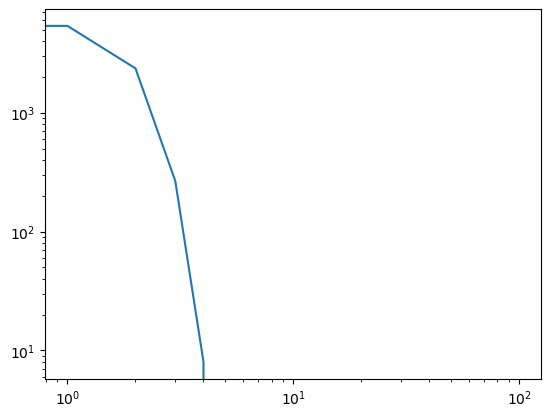

In [9]:
fig, ax = plt.subplots()
ax.loglog(range(n+1), parts_per_shell)

In [10]:
print(np.sum(parts_per_shell))

10000


In [11]:
# part_ratio = [parts_per_shell[n] / np.sum(parts_per_shell[:n]) for n in range(n_shells)]
# fig, ax = plt.subplots()
# ax.plot(range(n_shells), part_ratio)
# limit = 0.1
# ax.axhline(limit, c='r')
# ax.text(50, limit*1.1, f"limit={limit}", c='r')
# ax.axvline(range(n_shells)[np.round(part_ratio, 1) == limit])

In [12]:
# range(n_shells)[np.round(part_ratio, 1) == limit]